In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [12]:
IMAGE_SIZE = 256
CHANNELS = 3

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir= "AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [14]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [15]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.5085218  0.5046002  0.57518846]
  [0.5115367  0.50761515 0.5782034 ]
  [0.5145516  0.51063    0.58121824]
  ...
  [0.38903946 0.36158848 0.32730347]
  [0.49978444 0.46990046 0.45069298]
  [0.55845886 0.52468556 0.52252364]]

 [[0.4836978  0.47977623 0.55036443]
  [0.48721516 0.4832936  0.5538818 ]
  [0.4907325  0.48681092 0.55739915]
  ...
  [0.4171783  0.38972732 0.35644728]
  [0.5058142  0.47542772 0.45873263]
  [0.567001   0.5327252  0.5325732 ]]

 [[0.4666667  0.46274513 0.53333336]
  [0.4666667  0.46274513 0.53333336]
  [0.4666667  0.46274513 0.53333336]
  ...
  [0.44531712 0.41786614 0.38559106]
  [0.511844   0.480955   0.46677232]
  [0.5755431  0.5407649  0.5426228 ]]

 ...

 [[0.6219817  0.62590325 0.7043346 ]
  [0.605478   0.60939956 0.6878309 ]
  [0.5589793  0.56290084 0.6413322 ]
  ...
  [0.75641155 0.75249    0.80739194]
  [0.755909   0.75198746 0.8068894 ]
  [0.75540656 0.751485   0.80638695]]

 [[0.6204743  0.62439585 0.7028272 ]
  [0.5989458  0.60286736 0.68129873]


In [17]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [18]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [19]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.728007   0.72408545 0.7868306 ]
  [0.73333335 0.7294118  0.79215693]
  [0.73333335 0.7294118  0.79215693]
  ...
  [0.71483564 0.70363325 0.7585352 ]
  [0.71938735 0.7072746  0.7621766 ]
  [0.72393906 0.7109159  0.7658179 ]]

 [[0.72618634 0.72226477 0.78500986]
  [0.73333335 0.7294118  0.79215693]
  [0.73333335 0.7294118  0.79215693]
  ...
  [0.7041923  0.688506   0.74340796]
  [0.69508886 0.6794026  0.73430455]
  [0.68598545 0.6702992  0.72520113]]

 [[0.72436565 0.7204441  0.7831892 ]
  [0.73333335 0.7294118  0.79215693]
  [0.73333335 0.7294118  0.79215693]
  ...
  [0.6604502  0.64476395 0.6996659 ]
  [0.66090536 0.6452191  0.70012105]
  [0.66136056 0.6456743  0.70057625]]

 ...

 [[0.7829292  0.77508605 0.82606643]
  [0.782474   0.77463084 0.82561123]
  [0.78201884 0.7741757  0.8251561 ]
  ...
  [0.62858593 0.6050565  0.65211535]
  [0.64686614 0.62333673 0.67039555]
  [0.57476205 0.55123264 0.59829146]]

 [[0.7736018  0.76575863 0.816739  ]
  [0.7713259  0.76348275 0.81446314]


In [20]:
# Building a Model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [23]:
#Compiling Model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
1506/32

47.0625

In [25]:
215/32

6.71875

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=4,
)

Epoch 1/4
47/47 [==============================] - 212s 5s/step - loss: 0.8694 - accuracy: 0.4905 - val_loss: 0.7776 - val_accuracy: 0.5833
Epoch 2/4
47/47 [==============================] - 208s 4s/step - loss: 0.7031 - accuracy: 0.6533 - val_loss: 0.7062 - val_accuracy: 0.6875
Epoch 3/4
47/47 [==============================] - 208s 4s/step - loss: 0.5175 - accuracy: 0.7653 - val_loss: 0.4075 - val_accuracy: 0.8177
Epoch 4/4
47/47 [==============================] - 208s 4s/step - loss: 0.3249 - accuracy: 0.8636 - val_loss: 0.2972 - val_accuracy: 0.8854


In [28]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 22s 2s/step - loss: 0.3098 - accuracy: 0.8840


In [29]:
scores

[0.3097652494907379, 0.8839907050132751]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 4, 'steps': 47}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
type(history.history['loss'])

list

In [34]:
len(history.history['loss'])

4

In [35]:

history.history['loss'][:5] # show loss for first 5 epochs

[0.8693722486495972,
 0.7030507326126099,
 0.5174845457077026,
 0.3248784840106964]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [37]:
val_acc

[0.5833333134651184, 0.6875, 0.8177083134651184, 0.8854166865348816]

ValueError: x and y must have same first dimension, but have shapes (20,) and (4,)

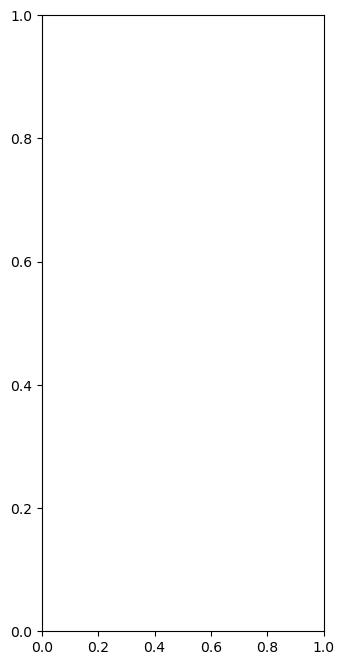

In [38]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

NameError: name 'labels_batch' is not defined

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step


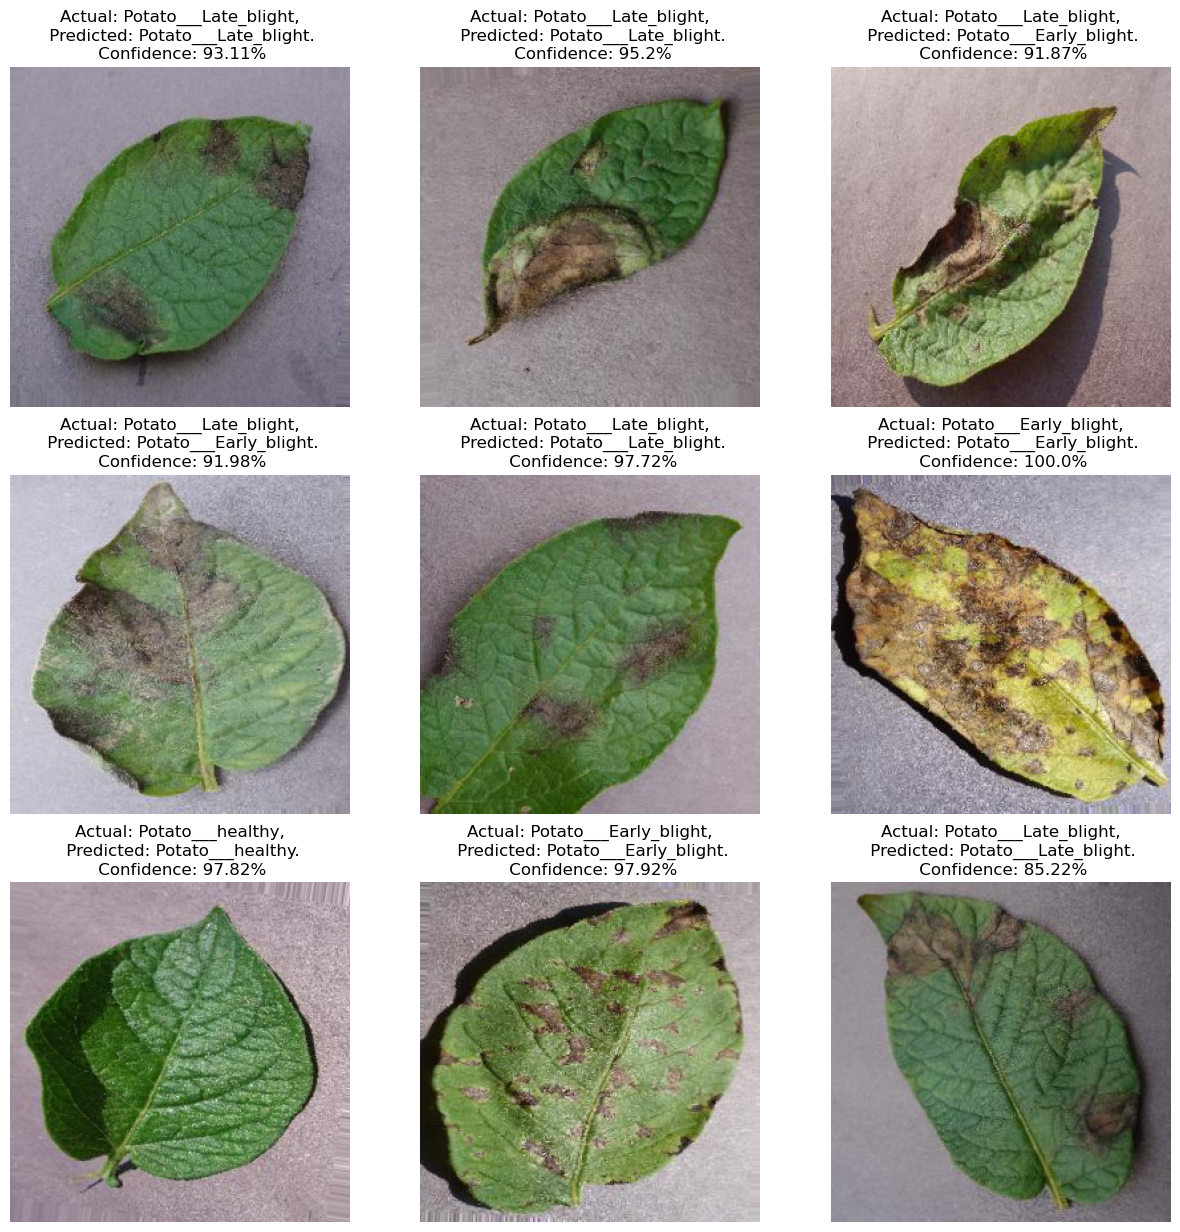

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [42]:
model.save("../potatoes.h5")